In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,9

In [201]:
import glob,csv
import pandas as pd
dataframe = pd.concat([pd.read_csv(i, lineterminator='\n') \
                for i in glob.glob(U'C:/Users/Sahaja/Desktop/tweets/*.csv')])

In [138]:
len(dataframe)

19871

In [139]:
dataframe.columns

Index(['text\r'], dtype='object')

In [140]:
dataframe.head()

,text\r
0,@reliablephoto4u @molewa_ E nor go better for ...
1,@karynmaughan The same should apply to banks t...
2,RT @RWPUSA: A quarter of a million bucks of ou...
3,female entrepreneur ted talks: nobody believed...
4,RT @GOPChairwoman: How can anyone oppose more ...


In [141]:
((dataframe[~(dataframe['text\r'].str.contains('[A-Za-z]'))].count()[0])/dataframe.count()[0])*100

0.31201248049922

In [142]:
dataframe.head()

,text\r
0,@reliablephoto4u @molewa_ E nor go better for ...
1,@karynmaughan The same should apply to banks t...
2,RT @RWPUSA: A quarter of a million bucks of ou...
3,female entrepreneur ted talks: nobody believed...
4,RT @GOPChairwoman: How can anyone oppose more ...


In [143]:
dataframe.columns,len(dataframe.columns)

(Index(['text\r'], dtype='object'), 1)

In [144]:
len(dataframe)

19871

In [145]:
dataframe.rename(columns={'text\r':'tweet_text'},inplace=True)

In [146]:
dataframe.head()

,tweet_text
0,@reliablephoto4u @molewa_ E nor go better for ...
1,@karynmaughan The same should apply to banks t...
2,RT @RWPUSA: A quarter of a million bucks of ou...
3,female entrepreneur ted talks: nobody believed...
4,RT @GOPChairwoman: How can anyone oppose more ...


In [147]:
dataframe.dtypes

tweet_text    object
dtype: object

In [148]:
import re
def data_cleansing(corpus):
    letters_only = re.sub("[^a-zA-Z]", " ", corpus) 
    words = letters_only.lower().split()                            
    return( " ".join( words ))
dataframe['tweet_text'] = dataframe['tweet_text'].apply(lambda x:data_cleansing(x))

In [149]:
!pip install textblob

In [150]:
from textblob import TextBlob

In [163]:
dataframe['sentiment_value']=dataframe.tweet_text.apply(lambda x:TextBlob(str((x).encode('ascii', 'ignore'))).sentiment.polarity)

In [164]:
TextBlob(str(('hello hate').encode('ascii', 'ignore'))).sentiment.polarity

-0.8

In [165]:
dataframe.dtypes

tweet_text          object
sentiment value    float64
sentiment_value    float64
dtype: object

In [166]:
dataframe['sentiment_score']=np.where(dataframe.sentiment_value<=0.0,1,0)

In [167]:
dataframe['sentiment_description']=np.where(dataframe.sentiment_value<=0.0,'negative','positive')

In [169]:
dataframe.head()

,tweet_text,sentiment value,sentiment_value,sentiment_score,sentiment_description
0,reliablephoto u molewa e nor go better for dem...,0.500000,0.500000,0,positive
1,karynmaughan the same should apply to banks th...,0.000000,0.000000,1,negative
2,rt rwpusa a quarter of a million bucks of our ...,-0.033333,-0.033333,1,negative
3,female entrepreneur ted talks nobody believed ...,0.000000,0.000000,1,negative
4,rt gopchairwoman how can anyone oppose more re...,0.125000,0.125000,0,positive


In [170]:
print(dataframe.sentiment_score.value_counts(),'\n\n',dataframe.sentiment_description.value_counts())

1    12094
0     7777
Name: sentiment_score, dtype: int64 

 negative    12094
positive     7777
Name: sentiment_description, dtype: int64


In [171]:
!pip install wordcloud

In [172]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def wordcloud(source,stop):
    tmp = dataframe[dataframe['sentiment_description']==source]
    clean_text=[]
    for each in tmp['tweet_text']:
        clean_text.append(each)
    clean_text = ' '.join(clean_text)
    if source == 'positive' :
        color='white'
    else:
        color='black'
    if (stop=="yes"):    
        wordcloud = WordCloud(background_color=color,
                          width=3000,
                          height=3000,stopwords = stopwords
                         ).generate(clean_text)
    else:
        wordcloud = WordCloud(background_color=color,
                          width=3000,
                          height=3000
                         ).generate(clean_text)
    print('==='*30)
    print('word cloud of '+source+' is plotted below')
    plt.figure(1,figsize=(8,8))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [173]:
stopwords.add('co')
stopwords.add('https')
stopwords.add('hey')
stopwords.add('hello')
stopwords.add('school')

word cloud of positive is plotted below


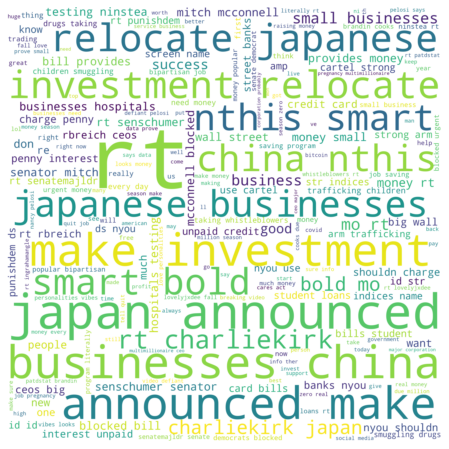

In [174]:
wordcloud('positive',"yes")

word cloud of negative is plotted below


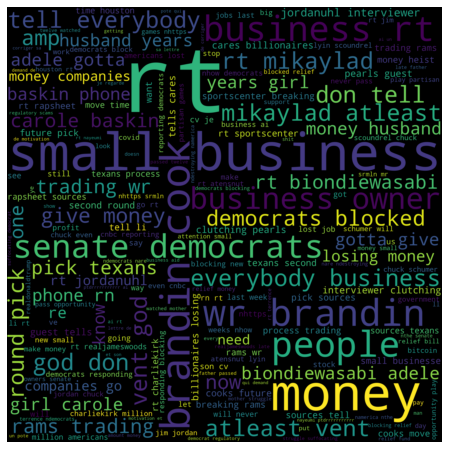

In [175]:
wordcloud('negative',"yes")

In [176]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataframe,test_size=0.3)

In [177]:
dataframe.head()

,tweet_text,sentiment value,sentiment_value,sentiment_score,sentiment_description
0,reliablephoto u molewa e nor go better for dem...,0.500000,0.500000,0,positive
1,karynmaughan the same should apply to banks th...,0.000000,0.000000,1,negative
2,rt rwpusa a quarter of a million bucks of our ...,-0.033333,-0.033333,1,negative
3,female entrepreneur ted talks nobody believed ...,0.000000,0.000000,1,negative
4,rt gopchairwoman how can anyone oppose more re...,0.125000,0.125000,0,positive


In [179]:
train_collection = []
test_collection = []
for each in train['tweet_text']:
    train_collection.append(each)
for each in test['tweet_text']:
    test_collection.append(each)
## Start creating them
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(stop_words='english',strip_accents='unicode',
                                    token_pattern=r'\w{2,}')
train_features = tfv.fit_transform(train_collection)
test_features=tfv.transform(test_collection)

In [180]:
print(train_features.shape)
print(test_features.shape)

(13909, 28605)
(5962, 28605)


In [181]:
tfv.get_feature_names()

['aa',
 'aaa',
 'aaagpuuhpr',
 'aaahhh',
 'aaaopinion',
 'aaayyy',
 'aab',
 'aacpbu',
 'aag',
 'aal',
 'aalivesmatter',
 'aamnafasihi',
 'aantonop',
 'aapl',
 'aapne',
 'aapofeoz',
 'aaron',
 'aaroncosbey',
 'aaronflan',
 'aaronjreiss',
 'aaronstigile',
 'aaronwilson',
 'aasheeni',
 'aasmith',
 'aasyea',
 'aav',
 'aawey',
 'aaxexchange',
 'ab',
 'abaga',
 'abakarmanany',
 'abakuas',
 'aban',
 'abandon',
 'abandoning',
 'abantu',
 'abba',
 'abbahmustaphaa',
 'abbc',
 'abbcfoundation',
 'abbiamo',
 'abc',
 'abcnews',
 'abcpolitics',
 'abd',
 'abducted',
 'abdulhafeez',
 'abdullahi',
 'abe',
 'abeauty',
 'abefe',
 'abeg',
 'aber',
 'aberrante',
 'abetz',
 'abf',
 'abg',
 'abgpzfabdv',
 'abhinandan',
 'abhizz',
 'abhwrm',
 'abi',
 'abilit',
 'ability',
 'abiyahmedali',
 'abiyiye',
 'abjured',
 'able',
 'ableg',
 'abluehedgehog',
 'abnos',
 'abo',
 'aboflondon',
 'abort',
 'abortion',
 'abortions',
 'abou',
 'abpoli',
 'abramovich',
 'abrasive',
 'abroad',
 'abrutis',
 'abs',
 'absence',
 '

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [183]:
Classifiers = {'lg':LogisticRegression(random_state=42,C=5,max_iter=200),\
               'dt':DecisionTreeClassifier(random_state=42,min_samples_leaf=1),\
               'rf':RandomForestClassifier(random_state=42,n_estimators=100,n_jobs=-1),\
               'gb':GradientBoostingClassifier(random_state=42,n_estimators=100,learning_rate=0.3)}

In [186]:
def ML_Pipeline(clf_name):
    clf = Classifiers[clf_name]
    fit = clf.fit(train_features,train['sentiment_description'])
    pred = clf.predict(test_features)
    Accuracy = accuracy_score(test['sentiment_description'],pred)
    Confusion_matrix = confusion_matrix(test['sentiment_description'],pred)
    print('==='*30)
    print('Accuracy of '+ clf_name +' is '+str(Accuracy))
    print('==='*30)
    print(Confusion_matrix)

In [187]:
ML_Pipeline('lg')

Accuracy of lg is 0.8903052666890305
[[3409  214]
 [ 440 1899]]


C:\Users\Sahaja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [188]:
test_collection

['taxpayers trump will be spending our money on ridiculous mining expeditions on the moon meanwhile no ventilators https t co msufs n u',
 'rt mikaylad atleast when you vent to god he don t tell everybody your business',
 'rt lauralitvan senate democrats block billion small business aid plan',
 'kinison said if you gonna miss heaven why do it by inches old money new bitches',
 'rt patriotm a demon rats working hard to kill off american small businesses',
 'rt bejeweled realdonaldtrump praises himself only as berates everyone else for the economic crisis he s caused according to him he',
 'rt theibang brian regan is giving away a classic album and donating money to comedian relief fund n nhttps t co nivsraeqq',
 'toolzbabe as long as you mind your business',
 'raider strong i m really leaning to them trading up with both st for okudah or simmons',
 'rt catturd if you think another loan is going to help a small business already stressed and shutdown you re a politician who couldn t',
 'r

In [189]:
train['sentiment_description']

2249    positive
3007    negative
934     negative
1465    negative
2166    negative
          ...   
3717    positive
6314    negative
6378    negative
1577    positive
6272    negative
Name: sentiment_description, Length: 13909, dtype: object

In [190]:
clf = RandomForestClassifier(random_state=42,n_estimators=100,n_jobs=-1)
fit = clf.fit(train_features,train['sentiment_description'])

In [191]:
words = tfv.get_feature_names()
importance = clf.feature_importances_
impordf = pd.DataFrame({'Word' : words,'Importance' : importance})
impordf = impordf.sort_values(['Importance', 'Word'], ascending=[0, 1])
impordf.head(20)

,Word,Importance
23869,success,0.021845
9395,good,0.018365
14207,love,0.012641
16480,new,0.011985
21604,rt,0.011847
2128,best,0.011557
21244,right,0.008736
8636,free,0.008659
14131,lol,0.008630
9564,great,0.007710


In [192]:
impordf.loc[impordf['Importance']<=0.0]

,Word,Importance
2,aaagpuuhpr,0.0
8,aag,0.0
9,aal,0.0
13,aapl,0.0
20,aaronstigile,0.0
...,...,...
28586,zxp,0.0
28592,zyn,0.0
28594,zys,0.0
28597,zzdw,0.0


In [193]:
clf = LogisticRegression(random_state=42,C=5,max_iter=200)
fit = clf.fit(train_features,train['sentiment_description'])
pred = clf.predict(test_features)
Accuracy = accuracy_score(test['sentiment_description'],pred)
Confusion_matrix = confusion_matrix(test['sentiment_description'],pred)
print('==='*30)
print('Accuracy of '+ 'lr' +' is '+str(Accuracy))
print('==='*30)
print(Confusion_matrix)

Accuracy of lr is 0.8903052666890305
[[3409  214]
 [ 440 1899]]


C:\Users\Sahaja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [194]:
!pip install joblib

In [195]:
from joblib import dump,load
dump(fit,'lr.joblib')
dump(tfv,'tfid.joblib')

['tfid.joblib']

In [196]:
from joblib import dump,load
model=load('lr.joblib')
tfidf_temp=load('tfid.joblib')



In [197]:
a=["internet is very slow",
   "issue with billing",
   "nice service provided",
   "thanks problem resolved"
   ,"HeyFriends I found great iPhone 6S giveaway     you can get it here---> #iphone6Sgiveawy2k16     Check it out looks like great freebie.     Don't Drop This"
  ,"Unfortunately I will have to transfer my lines to a different provider.  I would like to ensure there won't be any issues when my new provider attempts to port my numbers to their service?"]
tdf=pd.Series(a).astype(str).apply(lambda x:data_cleansing(x))
t_a=tfidf_temp.transform(tdf)
pred1 = model.predict(t_a)

In [198]:
pred1

array(['negative', 'negative', 'positive', 'positive', 'positive',
       'positive'], dtype=object)

In [199]:
type(tdf)

pandas.core.series.Series